<h1 style="text-align: center;">Laptop Price Predictor</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the global style properties for all plots
sns.set(style="whitegrid")
sns.set_palette("viridis")
plt.rcParams["axes.titleweight"] = "bold"

In [3]:
df = pd.read_csv('../Dataset/laptop_data.csv')

### Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
duplicated = df.duplicated().sum()
null_count = df.isnull().sum()

print(f"Duplicated Sum: {duplicated}\n{'-'*25}")
print(f"Null Count:\n{'-'*25}\n{null_count}")

Duplicated Sum: 0
-------------------------
Null Count:
-------------------------
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### 01. Unnamed

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### 02. Company

In [8]:
company_counts = df['Company'].value_counts()
company_counts

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

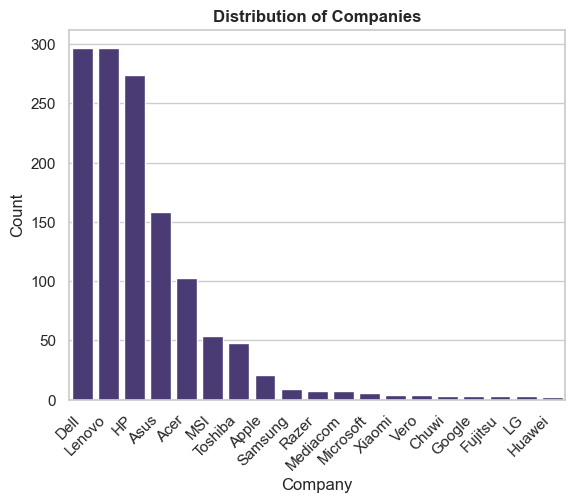

In [9]:
sns.countplot(x='Company', data=df, order=company_counts.index)
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Companies')
plt.ylabel('Count')
plt.show()

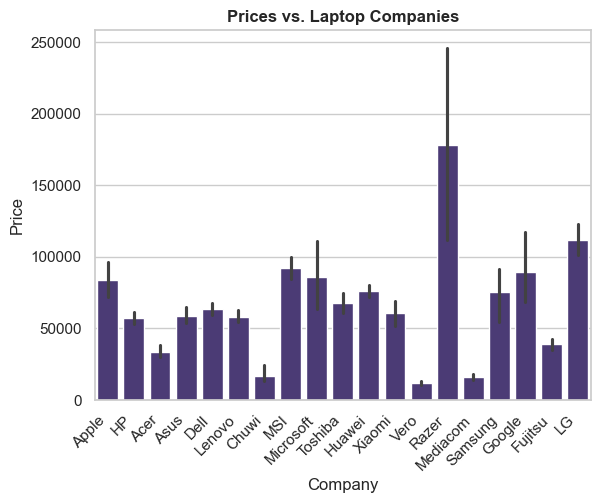

In [10]:
sns.barplot(x='Company', y='Price', data=df)
plt.xticks(rotation=45, ha='right')

plt.title('Prices vs. Laptop Companies')
plt.show()

#### 03. Laptop Type

In [11]:
laptop_types = df['TypeName'].value_counts()
laptop_types

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

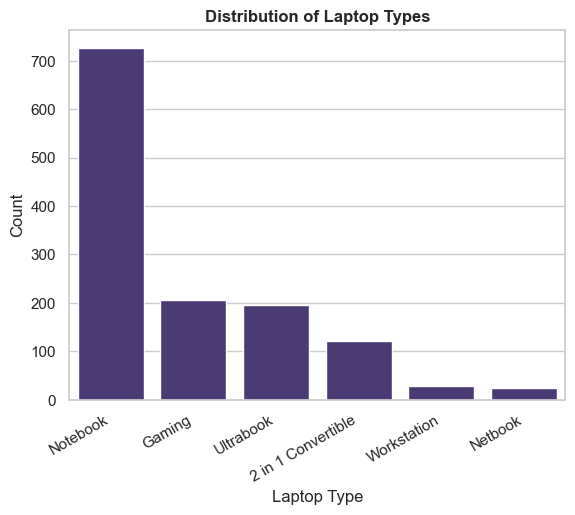

In [12]:
sns.countplot(x='TypeName', data=df, order=laptop_types.index)
plt.xticks(rotation=30, ha='right')

plt.title('Distribution of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.show()

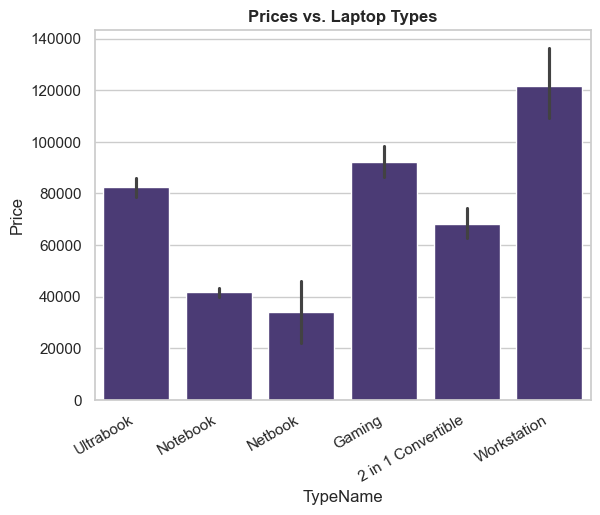

In [13]:
sns.barplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. Laptop Types')
plt.show()

#### 04. Screen Inches

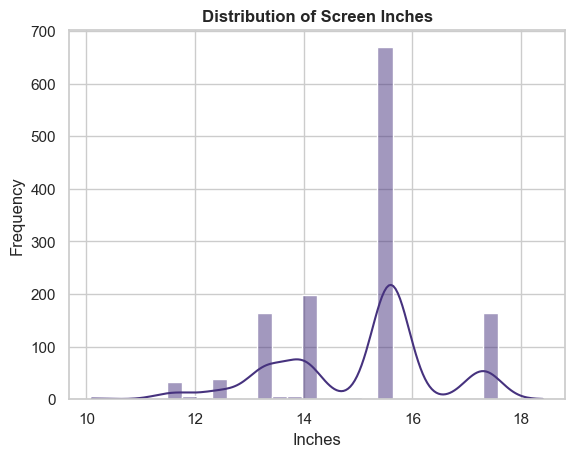

In [14]:
sns.histplot(df['Inches'], kde=True, bins=30)

plt.title('Distribution of Screen Inches')
plt.ylabel('Frequency')

plt.show()

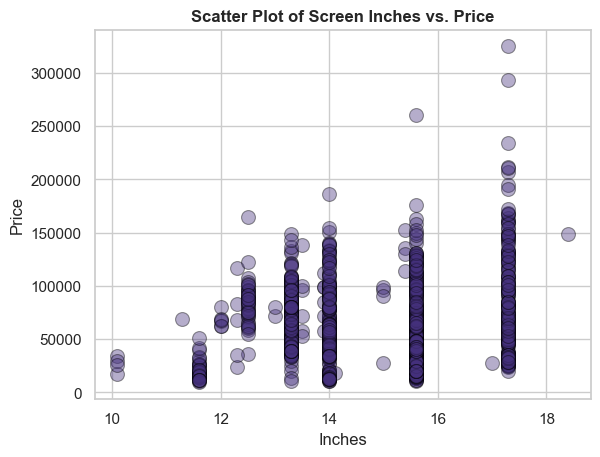

In [15]:
sns.scatterplot(x='Inches', y='Price', data=df, edgecolor='black', s=100, alpha=0.4)

plt.title('Scatter Plot of Screen Inches vs. Price')
plt.show()

#### 05. Screen Resolution

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [17]:
resolution_counts = df['ScreenResolution'].value_counts()
resolution_counts

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [19]:
temp = ['Inches', 'ScreenResolution', 'IPS', 'TouchScreen']
df[temp].sample(5)

,Inches,ScreenResolution,IPS,TouchScreen
22,15.6,1366x768,0,0
541,14.0,Full HD 1920x1080,0,0
1134,15.6,Full HD 1920x1080,0,0
392,15.6,IPS Panel 1366x768,1,0
334,15.6,Full HD 1920x1080,0,0


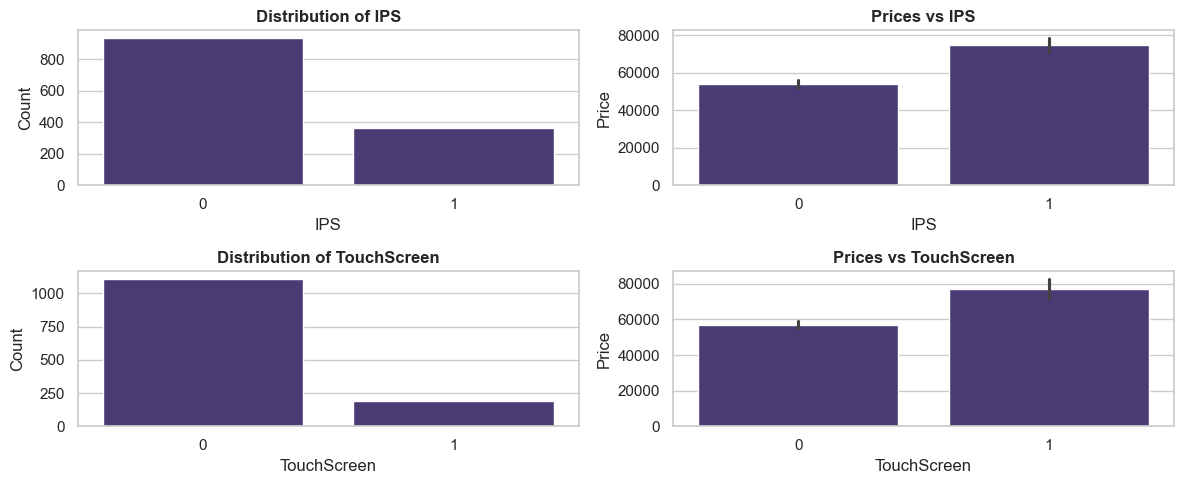

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# plot 1:
sns.countplot(x='IPS', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of IPS')
axes[0, 0].set_ylabel('Count')

# plot 2:
sns.barplot(x='IPS', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Prices vs IPS')

# plot 3:
sns.countplot(x='TouchScreen', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of TouchScreen')
axes[1, 0].set_ylabel('Count')

# plot 4:
sns.barplot(x='TouchScreen', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Prices vs TouchScreen')

plt.tight_layout()
plt.show()

In [21]:
def get_resolution(data):
    x, y = [], []
    data = data.str.split()
    m = data.shape[0]
    for i in range(m):
        z = (data[i][-1]).split('x')
        x.append(int(z[0]))
        y.append(int(z[1]))
    return x, y

func = get_resolution(df['ScreenResolution'])
df['X Resolution'] = func[0]
df['Y Resolution'] = func[1]

In [22]:
temp.extend(['X Resolution', 'Y Resolution'])

In [23]:
df[temp].sample(5)

,Inches,ScreenResolution,IPS,TouchScreen,X Resolution,Y Resolution
473,13.3,Full HD / Touchscreen 1920x1080,0,1,1920,1080
181,13.3,Full HD 1920x1080,0,0,1920,1080
13,15.6,Full HD 1920x1080,0,0,1920,1080
208,13.3,Full HD 1920x1080,0,0,1920,1080
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,1,1,3200,1800


In [24]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1303 non-null   float64
 1   ScreenResolution  1303 non-null   object 
 2   IPS               1303 non-null   int64  
 3   TouchScreen       1303 non-null   int64  
 4   X Resolution      1303 non-null   int64  
 5   Y Resolution      1303 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 61.2+ KB


In [25]:
x = df['X Resolution']**2
y = df['Y Resolution']**2

df['PPI'] = ((x + y)**0.5)/df['Inches']
df['PPI'] = df['PPI'].astype('float64')
df['PPI'].head()

0    226.983005
1    127.677940
2    141.211998
3    220.534624
4    226.983005
Name: PPI, dtype: float64

In [26]:
temp.append('PPI')
temp.append('Price')
temp.remove('ScreenResolution')
temp

['Inches',
 'IPS',
 'TouchScreen',
 'X Resolution',
 'Y Resolution',
 'PPI',
 'Price']

In [27]:
df[temp].corr()['Price']

Inches          0.068197
IPS             0.252208
TouchScreen     0.191226
X Resolution    0.556529
Y Resolution    0.552809
PPI             0.473487
Price           1.000000
Name: Price, dtype: float64

In [28]:
df.drop(columns=['ScreenResolution', 'X Resolution', 'Y Resolution', 'Inches'], inplace=True)

In [29]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005


#### 06. CPU

In [30]:
cpu_counts = df['Cpu'].value_counts()
cpu_counts

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [31]:
df['temp_df'] = df['Cpu'].apply(
    lambda x: " ".join(x.split()[0:3])
)

In [32]:
df['temp_df'].sample(10)

1299         Intel Core i7
510          Intel Core i5
710          Intel Core i7
545          Intel Core i3
281          Intel Core i3
1261          Intel Core M
729     AMD A9-Series 9420
226          Intel Core i7
1226         Intel Core i7
326          Intel Core i5
Name: temp_df, dtype: object

In [33]:
df['temp_df'].value_counts()

temp_df
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1


In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    return 'AMD Processor'

In [35]:
df['CPU Brand'] = df['temp_df'].apply(fetch_processor)

In [36]:
df.drop(columns=['Cpu', 'temp_df'], inplace=True)

In [37]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
786,MSI,Gaming,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,58021.920,0,0,141.211998,Intel Core i5
684,Lenovo,2 in 1 Convertible,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19kg,79866.720,1,1,165.632118,Intel Core i7
654,HP,Notebook,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,19441.872,0,0,100.454670,Intel Core i3
1287,HP,Notebook,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.920,0,0,100.454670,Intel Core i7
1079,HP,Notebook,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,2.31kg,50083.200,0,0,141.211998,Intel Core i5


In [38]:
cpu_counts = df['CPU Brand'].value_counts()
cpu_counts

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

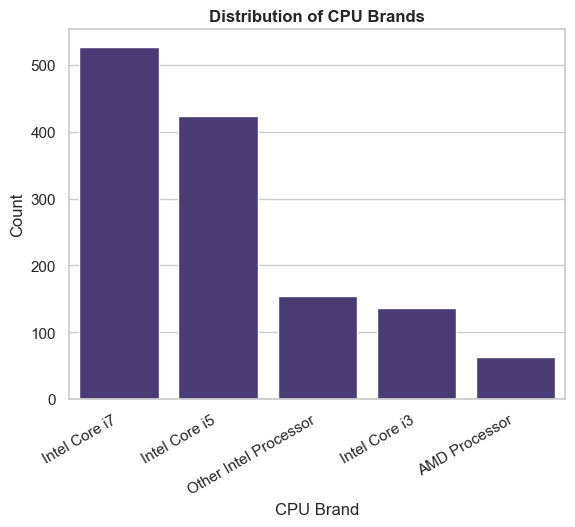

In [39]:
sns.countplot(x='CPU Brand', data=df, order=cpu_counts.index)
plt.xticks(rotation=30, ha='right')

plt.title('Distribution of CPU Brands')
plt.ylabel('Count')
plt.show()

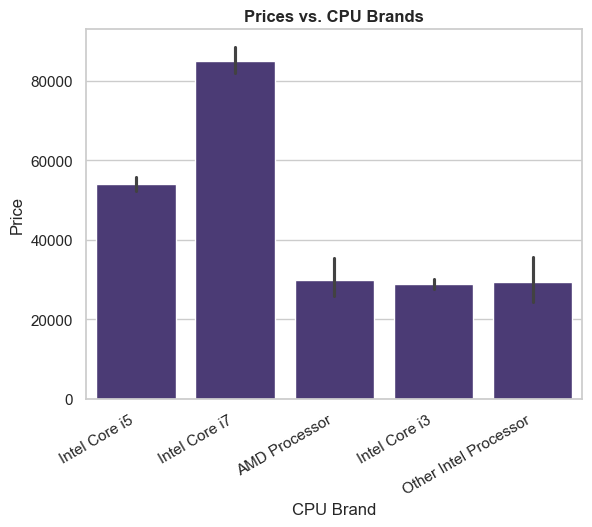

In [40]:
sns.barplot(x='CPU Brand', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. CPU Brands')
plt.show()

#### 07. RAM

In [41]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype('int32')

In [42]:
df.rename(columns={'Ram': 'RAM'}, inplace=True)

In [43]:
df.sample(5)

,Company,TypeName,RAM,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
806,Toshiba,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.1kg,41558.4000,0,0,100.454670,Intel Core i5
80,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,58403.4048,1,0,141.211998,Intel Core i5
1199,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,109165.3920,0,0,127.335675,Intel Core i7
229,HP,Notebook,8,1TB HDD,AMD FirePro W4190M,Windows 10,1.9kg,67612.3200,0,0,141.211998,Intel Core i7
1239,Lenovo,Notebook,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.4kg,79866.7200,1,0,165.632118,Intel Core i7


In [44]:
ram_counts = df['RAM'].value_counts()
ram_counts

RAM
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

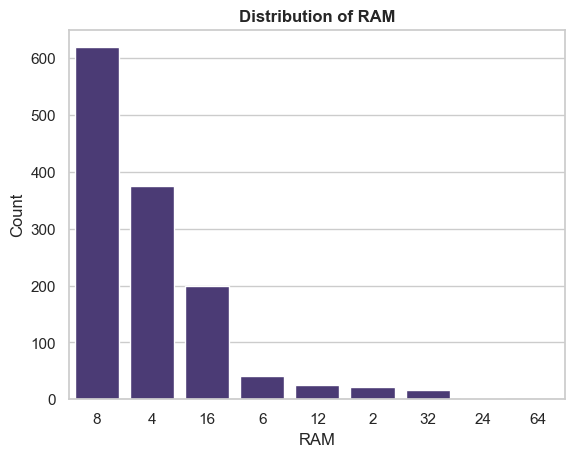

In [45]:
sns.countplot(x='RAM', data=df, order=ram_counts.index)

plt.title('Distribution of RAM')
plt.ylabel('Count')
plt.show()

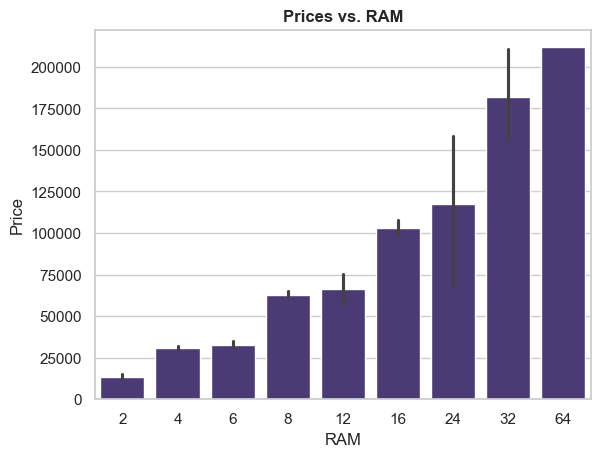

In [46]:
sns.barplot(x='RAM', y='Price', data=df)

plt.title('Prices vs. RAM')
plt.show()

#### 08. Memory

In [47]:
df.head()

,Company,TypeName,RAM,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005,Intel Core i5


In [48]:
memory_counts = df['Memory'].value_counts()
memory_counts

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [49]:
# replaces the substring '.0' with an empty string
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df['Memory']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [50]:
temp_df = df["Memory"].str.split("+", n=1, expand=True)
temp_df.sample(10)

,0,1
1188,256 SSD,None
422,256 SSD,None
933,1000 SSD,None
254,256 SSD,None
1138,256 SSD,1000 HDD
1141,128 SSD,1000 HDD
862,128 SSD,None
41,256 SSD,1000 HDD
1120,32 Flash Storage,None
239,256 SSD,None


In [51]:
df['temp1'] = temp_df[0].str.strip()
df['temp1'].sample(10)

29              1000 HDD
1221             128 SSD
436              500 HDD
986             1000 HDD
802              256 SSD
456             1000 HDD
948             1000 HDD
321             1000 HDD
584     16 Flash Storage
1180             256 SSD
Name: temp1, dtype: object

In [52]:
df['temp2'] = temp_df[1].fillna("0")
df['temp2'].sample(10)

213     0
1055    0
897     0
502     0
547     0
892     0
1022    0
646     0
182     0
1194    0
Name: temp2, dtype: object

In [53]:
df['temp1_HDD'] = df['temp1'].apply(lambda x: 1 if 'HDD' in x else 0)
df['temp1_SSD'] = df['temp1'].apply(lambda x: 1 if 'SSD' in x else 0)
df['temp1_Hybrid'] = df['temp1'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['temp1_FlashStorage'] = df['temp1'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [54]:
temp = ['Memory', 'temp1', 'temp1_HDD','temp1_SSD', 'temp1_Hybrid', 'temp1_FlashStorage', 'temp2']

df[temp].sample(5)

,Memory,temp1,temp1_HDD,temp1_SSD,temp1_Hybrid,temp1_FlashStorage,temp2
433,512 SSD,512 SSD,0,1,0,0,0
191,32 Flash Storage,32 Flash Storage,0,0,0,1,0
805,256 SSD,256 SSD,0,1,0,0,0
441,256 SSD,256 SSD,0,1,0,0,0
1278,500 HDD,500 HDD,1,0,0,0,0


In [55]:
df['temp2_HDD'] = df['temp2'].apply(lambda x: 1 if 'HDD' in x else 0)
df['temp2_SSD'] = df['temp2'].apply(lambda x: 1 if 'SSD' in x else 0)
df['temp2_Hybrid'] = df['temp2'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['temp2_FlashStorage'] = df['temp2'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [56]:
temp.extend(['temp2_HDD', 'temp2_SSD', 'temp2_Hybrid', 'temp2_FlashStorage'])

In [57]:
df[temp].sample(5)

,Memory,temp1,temp1_HDD,temp1_SSD,temp1_Hybrid,temp1_FlashStorage,temp2,temp2_HDD,temp2_SSD,temp2_Hybrid,temp2_FlashStorage
1106,128 SSD + 1000 HDD,128 SSD,0,1,0,0,1000 HDD,1,0,0,0
911,240 SSD,240 SSD,0,1,0,0,0,0,0,0,0
199,256 SSD,256 SSD,0,1,0,0,0,0,0,0,0
1262,1000 HDD,1000 HDD,1,0,0,0,0,0,0,0,0
656,256 SSD,256 SSD,0,1,0,0,0,0,0,0,0


In [58]:
# removing all non-numeric characters
df['temp1'] = df['temp1'].str.replace(r'\D', '', regex=True)
df['temp2'] = df['temp2'].str.replace(r'\D', '', regex=True)

df["temp1"] = df["temp1"].astype(int)
df["temp2"] = df["temp2"].astype(int)

In [59]:
df[temp].sample(5)

,Memory,temp1,temp1_HDD,temp1_SSD,temp1_Hybrid,temp1_FlashStorage,temp2,temp2_HDD,temp2_SSD,temp2_Hybrid,temp2_FlashStorage
499,256 SSD,256,0,1,0,0,0,0,0,0,0
806,500 HDD,500,1,0,0,0,0,0,0,0,0
407,512 SSD,512,0,1,0,0,0,0,0,0,0
1007,256 SSD,256,0,1,0,0,0,0,0,0,0
81,512 SSD,512,0,1,0,0,0,0,0,0,0


In [60]:
df['HDD'] = (df['temp1'] * df['temp1_HDD'] + df['temp2'] * df['temp2_HDD'])
df['SSD'] = (df['temp1'] * df['temp1_SSD'] + df['temp2'] * df['temp2_SSD'])

df['Hybrid'] = (df['temp1'] * df['temp1_Hybrid'] + df['temp2'] * df['temp2_Hybrid'])
df['FlashStorage'] = (df['temp1'] * df['temp1_FlashStorage'] + df['temp2'] * df['temp2_FlashStorage'])

In [61]:
df.drop(
    columns=[
        'Memory',
        'temp1', 'temp1_HDD', 'temp1_SSD', 'temp1_Hybrid', 'temp1_FlashStorage', 
        'temp2', 'temp2_HDD', 'temp2_SSD', 'temp2_Hybrid', 'temp2_FlashStorage'
    ], inplace=True
)

In [62]:
df.sample(5)

,Company,TypeName,RAM,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD,Hybrid,FlashStorage
126,HP,Notebook,8,Intel UHD Graphics 620,Windows 10,1.63kg,43263.36,0,0,157.350512,Intel Core i5,1000,0,0,0
486,Dell,Workstation,16,Nvidia Quadro M620,Windows 10,2.17kg,124568.64,1,0,141.211998,Intel Core i7,0,512,0,0
1265,Lenovo,Notebook,8,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.72,1,0,141.211998,Intel Core i7,1000,0,0,0
175,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,2.3kg,24455.52,0,0,100.454670,Intel Core i3,1000,0,0,0
605,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,1.8kg,122490.72,0,0,282.423996,Intel Core i7,2000,256,0,0


In [63]:
df[['Price', 'HDD', 'SSD', 'Hybrid', 'FlashStorage']].corr()['Price']

Price           1.000000
HDD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage   -0.040511
Name: Price, dtype: float64

In [64]:
df.drop(columns=['Hybrid', 'FlashStorage'], inplace=True)

In [65]:
df.sample(5)

,Company,TypeName,RAM,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD
887,Asus,Gaming,12,Nvidia GeForce GTX 1050,Windows 10,2.2kg,72988.2720,0,0,127.335675,Intel Core i5,1000,128
474,Asus,Notebook,12,Intel HD Graphics 530,Windows 10,2.06kg,69210.7200,1,0,282.423996,Intel Core i7,1000,128
720,Lenovo,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.17kg,89864.1792,1,0,209.800683,Intel Core i7,0,512
881,HP,2 in 1 Convertible,4,Intel HD Graphics 620,Windows 10,2.3kg,36486.1440,0,1,100.454670,Intel Core i5,500,0
990,HP,Netbook,8,Intel HD Graphics 515,Windows 10,0.97kg,101658.2400,0,0,176.232574,Other Intel Processor,0,512


In [66]:
hdd_counts = df['HDD'].value_counts()
hdd_counts

HDD
0       727
1000    408
500     134
2000     32
32        1
128       1
Name: count, dtype: int64

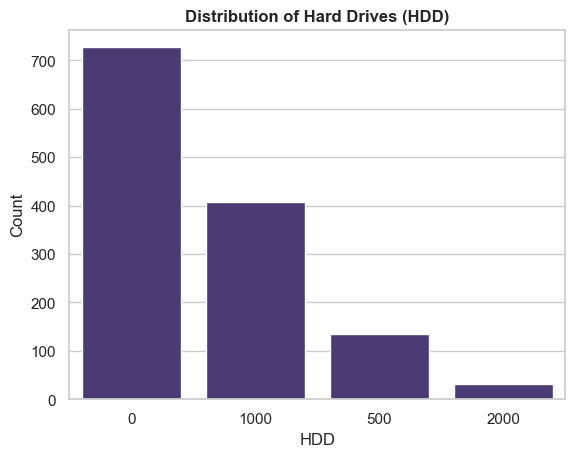

In [67]:
sns.countplot(x='HDD', data=df, order=hdd_counts[:-2].index)

plt.title('Distribution of Hard Drives (HDD)')
plt.ylabel('Count')
plt.show()

In [68]:
sdd_counts = df['SSD'].value_counts()
sdd_counts

SSD
256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64

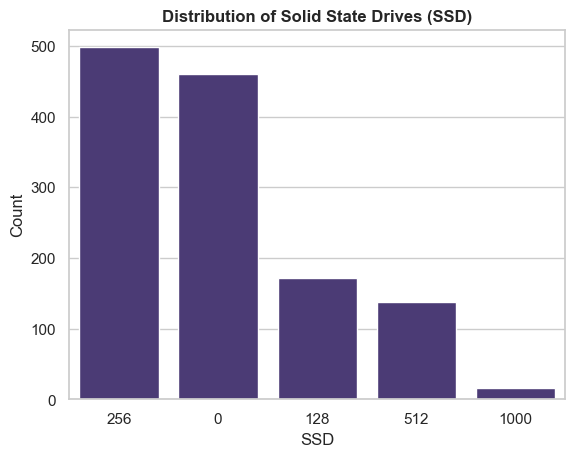

In [69]:
sns.countplot(x='SSD', data=df, order=sdd_counts[:5].index)

plt.title('Distribution of Solid State Drives (SSD)')
plt.ylabel('Count')
plt.show()

#### 09. GPU

In [70]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [71]:
df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['GPU Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: GPU Brand, Length: 1303, dtype: object

In [72]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [73]:
df = df[df['GPU Brand'] != 'ARM']

In [74]:
gpu_counts = df['GPU Brand'].value_counts()
gpu_counts

GPU Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

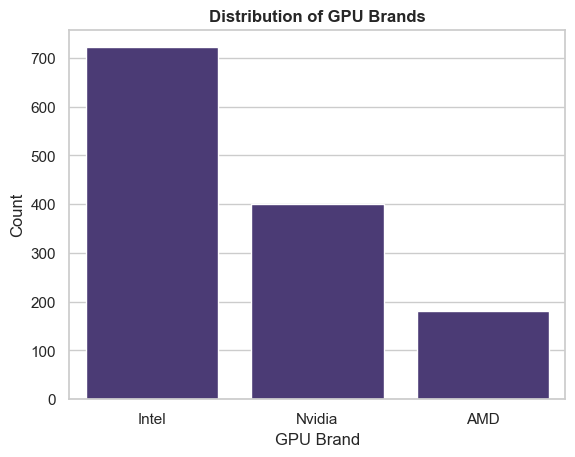

In [75]:
sns.countplot(x='GPU Brand', data=df, order=gpu_counts.index)

plt.title('Distribution of GPU Brands')
plt.ylabel('Count')
plt.show()

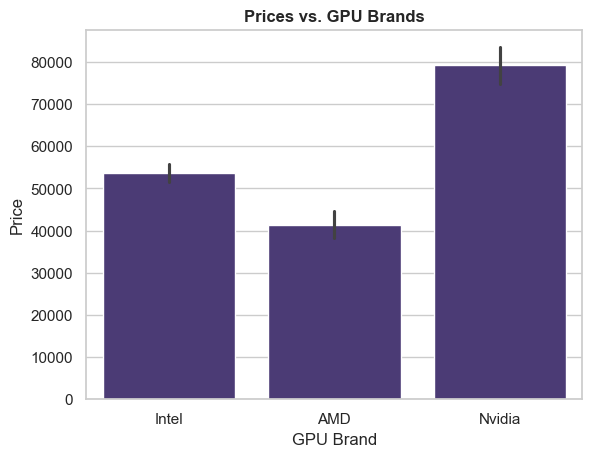

In [76]:
sns.barplot(x='GPU Brand', y='Price', data=df)

plt.title('Prices vs. GPU Brands')
plt.show()

In [77]:
df.drop(columns=['Gpu'], inplace=True)

#### 10. Operating System

In [78]:
df.head()

,Company,TypeName,RAM,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37kg,71378.6832,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83kg,135195.3360,1,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37kg,96095.8080,1,0,226.983005,Intel Core i5,0,256,Intel


In [79]:
os_counts = df['OpSys'].value_counts()
os_counts

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

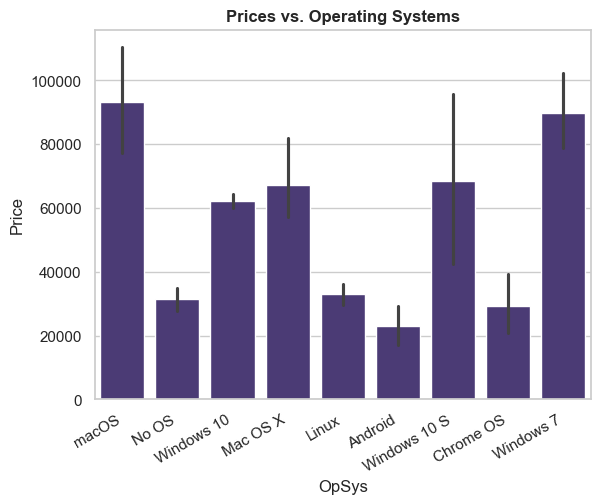

In [80]:
sns.barplot(x='OpSys', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. Operating Systems')
plt.show()

In [81]:
def handle_os(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    return 'Linux/No OS/Others'

In [82]:
df.loc[:, 'OS'] = df['OpSys'].apply(handle_os)

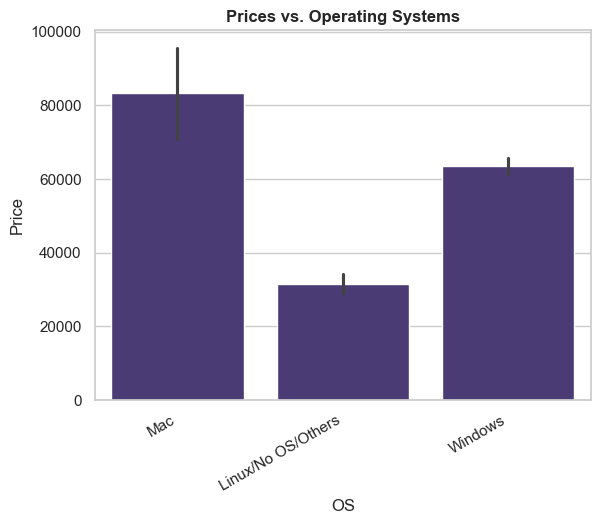

In [83]:
sns.barplot(x='OS', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. Operating Systems')
plt.show()

In [84]:
df.drop(columns=['OpSys'], inplace=True)

#### 11. Weight

In [85]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float32')

In [86]:
df.head()

,Company,TypeName,RAM,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,0,256,Intel,Mac


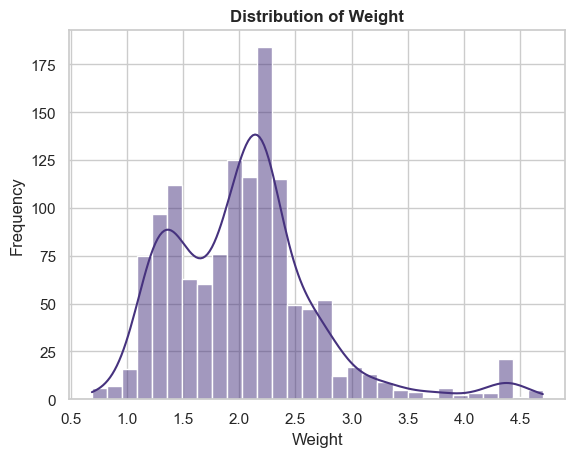

In [87]:
sns.histplot(df['Weight'], kde=True, bins=30)

plt.title('Distribution of Weight')
plt.ylabel('Frequency')

plt.show()

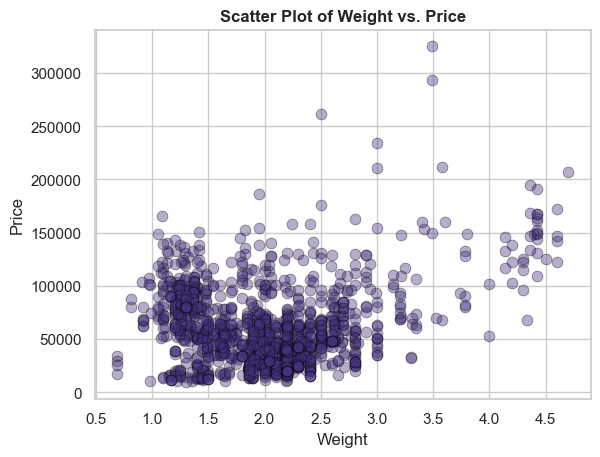

In [88]:
sns.scatterplot(x='Weight', y='Price', data=df, edgecolor='black', s=60, alpha=0.4)

plt.title('Scatter Plot of Weight vs. Price')
plt.show()

In [89]:
df.head()

,Company,TypeName,RAM,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/No OS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,0,256,Intel,Mac


In [90]:
corrcoef = ['Price', 'RAM', 'SSD', 'PPI', 'IPS', 'Weight', 'TouchScreen', 'HDD']

matrix = df[corrcoef].corr()
matrix['Price']

Price          1.000000
RAM            0.742905
SSD            0.670660
PPI            0.475368
IPS            0.253320
Weight         0.209867
TouchScreen    0.192917
HDD           -0.096891
Name: Price, dtype: float64

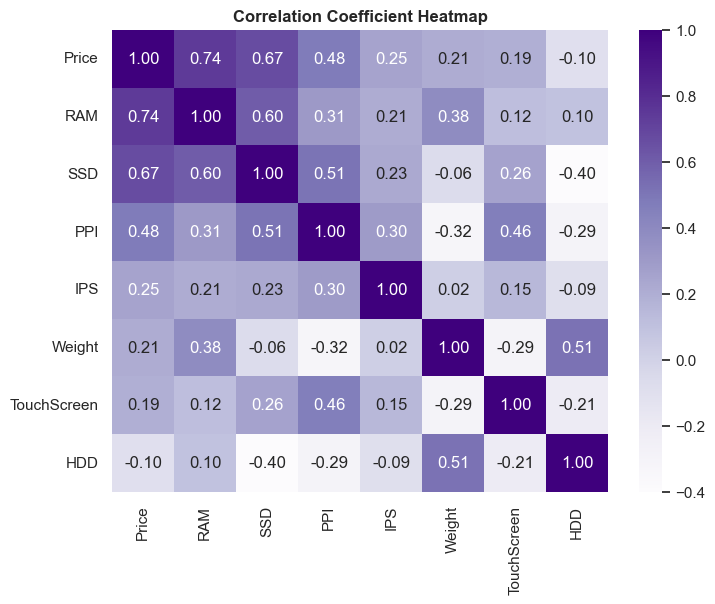

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap="Purples", fmt=".2f")
plt.title("Correlation Coefficient Heatmap")
plt.show()

#### 12. Price

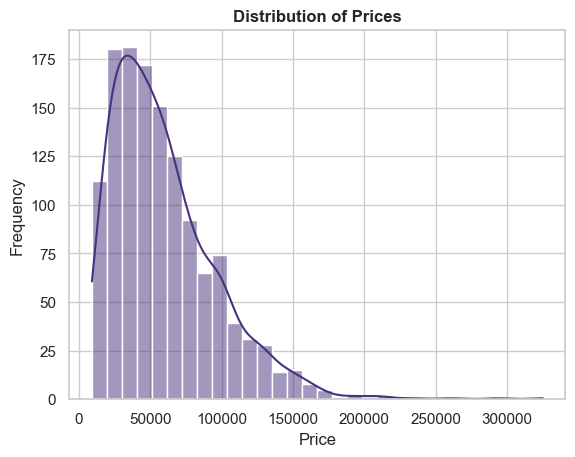

In [92]:
sns.histplot(df['Price'], kde=True, bins=30)

plt.title('Distribution of Prices')
plt.ylabel('Frequency')

plt.show()

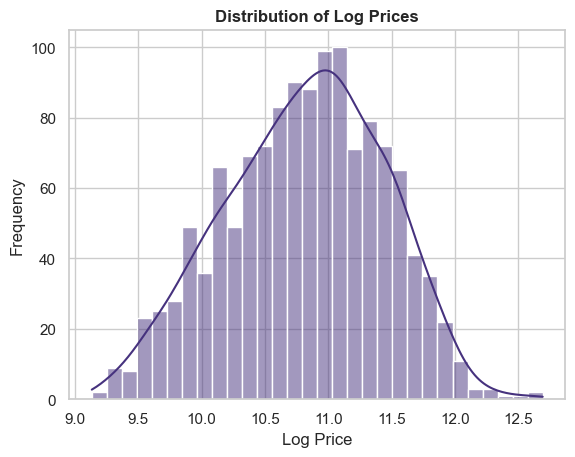

In [93]:
price = np.log(df['Price'])

sns.histplot(price, kde=True, bins=30)

plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.show()

In [94]:
df.sample(5)

,Company,TypeName,RAM,Weight,Price,IPS,TouchScreen,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
559,Dell,Notebook,4,2.18,32921.712,0,0,100.454670,Intel Core i3,1000,0,AMD,Windows
76,Lenovo,Notebook,8,2.20,27652.320,0,0,141.211998,Intel Core i5,2000,0,Intel,Linux/No OS/Others
274,Toshiba,Notebook,8,2.20,43263.360,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
385,Lenovo,Ultrabook,8,1.13,121584.960,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
313,Acer,Notebook,8,2.23,24988.320,0,0,141.211998,AMD Processor,0,256,AMD,Windows
